In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
!unzip data.zip

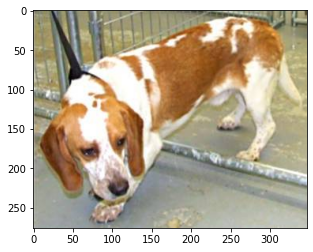

In [ ]:
path="data/dog/dog.132.jpg"
i = cv2.imread(path)
i = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.imshow(i)

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize

In [ ]:
target = []  
flat_data = []   
images=[]
path = 'data/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)


(24, 7500)
(24,)
(24, 50, 50, 3)


In [ ]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.205510,0.126451,0.151608,0.047686,0.021235,0.043137,0.104588,0.039882,0.071255,0.290569,0.126157,0.185647,0.306843,0.127118,0.175804,0.179020,0.081020,0.111725,0.075137,0.036922,0.058490,0.105922,0.041843,0.069961,0.249059,0.106549,0.140882,0.271216,0.127451,0.158490,0.161039,0.069588,0.096039,0.091157,0.043137,0.056529,0.137627,0.061784,0.087608,0.230157,...,0.541216,0.364118,0.417059,0.346098,0.270961,0.294824,0.285686,0.229157,0.264451,0.272627,0.229490,0.262824,0.324275,0.254020,0.295196,0.542882,0.355647,0.416098,0.705255,0.416392,0.496118,0.591529,0.372294,0.446137,0.548392,0.377176,0.434039,0.379804,0.293529,0.323275,0.282765,0.245843,0.273294,0.254314,0.216098,0.240922,0.321608,0.274549,0.303333,cat
1,0.411765,0.286275,0.203922,0.402078,0.276588,0.194235,0.384314,0.258824,0.176471,0.397545,0.274219,0.189922,0.423529,0.284262,0.205830,0.431373,0.294118,0.219608,0.429223,0.298039,0.227451,0.444510,0.315098,0.248431,0.458824,0.329412,0.262745,0.462745,0.333333,0.266667,0.470588,0.341176,0.274510,0.458824,0.329412,0.262745,0.462745,0.333333,0.266667,0.454000,...,0.193520,0.141176,0.118627,0.221961,0.163647,0.125490,0.239216,0.172549,0.137255,0.249607,0.156863,0.106940,0.324538,0.199047,0.139882,0.345608,0.243469,0.168627,0.344588,0.243137,0.168118,0.359255,0.291059,0.242471,0.331020,0.307490,0.294118,0.285216,0.277373,0.265898,0.151647,0.143804,0.148006,0.074510,0.056745,0.052824,0.074510,0.050980,0.043137,cat
2,0.061176,0.041569,0.027843,0.072549,0.054902,0.031373,0.082745,0.066667,0.024314,0.094510,0.070588,0.031373,0.105882,0.078431,0.036078,0.105882,0.082353,0.035294,0.105882,0.082353,0.035294,0.102353,0.078824,0.031765,0.098039,0.074510,0.027451,0.098039,0.074510,0.027451,0.102353,0.078824,0.031765,0.109804,0.083137,0.035294,0.112157,0.083137,0.035294,0.127843,...,0.080392,0.069020,0.128235,0.141176,0.113725,0.090196,0.156863,0.117647,0.094118,0.148627,0.107451,0.074510,0.115294,0.092157,0.054902,0.101961,0.080784,0.048627,0.098039,0.070588,0.043137,0.090196,0.062745,0.035294,0.090196,0.062745,0.041569,0.094118,0.074510,0.040000,0.094118,0.074510,0.043137,0.088235,0.066667,0.039216,0.074510,0.047451,0.035294,cat
3,0.851373,0.851373,0.889686,0.875686,0.895882,0.917020,0.889451,0.910116,0.918865,0.914627,0.927294,0.927294,0.904431,0.912275,0.916945,0.884941,0.883608,0.904153,0.842196,0.840392,0.868745,0.760000,0.779608,0.803182,0.682549,0.700621,0.733608,0.602549,0.616816,0.662753,0.543882,0.563247,0.610305,0.497961,0.508793,0.556784,0.481451,0.475490,0.529490,0.460824,...,0.848637,0.858745,0.900598,0.839225,0.847068,0.894127,0.828266,0.836109,0.883168,0.814745,0.828831,0.879757,0.795889,0.819418,0.874320,0.796078,0.819608,0.874510,0.792157,0.815686,0.870588,0.804275,0.835647,0.880505,0.817490,0.848863,0.892000,0.815373,0.846745,0.892902,0.798510,0.829882,0.874982,0.766433,0.797805,0.840942,0.740745,0.772235,0.818000,cat
4,0.278431,0.282353,0.262745,0.278431,0.282353,0.262745,0.278431,0.282353,0.262745,0.282353,0.286275,0.266667,0.282353,0.286275,0.266667,0.286275,0.290196,0.270588,0.286275,0.290196,0.273686,0.286275,0.290196,0.270588,0.290196,0.294118,0.274510,0.304980,0.308902,0.293216,0.346235,0.354078,0.321020,0.420667,0.424588,0.361490,0.492157,0.488235,0.405882,0.525490,...,0.326931,0.239216,0.164706,0.321569,0.233294,0.157216,0.325490,0.235294,0.160784,0.321109,0.235294,0.160784,0.319569,0.235294,0.160784,0.321569,0.239216,0.163841,0.321569,0.235294,0.173373,0.328902,0.242627,0.186054,0.344195,0.262902,0.208000,0.332588,0.258078,0.203176,0.310092,0.235582,0.180392,0.304862,0.230353,0.172549,0.305882,0.231373,0.172549,cat


In [ ]:
X=df.drop("Target",axis=1)

In [ ]:
y=df["Target"]

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.205510,0.126451,0.151608,0.047686,0.021235,0.043137,0.104588,0.039882,0.071255,0.290569,0.126157,0.185647,0.306843,0.127118,0.175804,0.179020,0.081020,0.111725,0.075137,0.036922,0.058490,0.105922,0.041843,0.069961,0.249059,0.106549,0.140882,0.271216,0.127451,0.158490,0.161039,0.069588,0.096039,0.091157,0.043137,0.056529,0.137627,0.061784,0.087608,0.230157,...,0.517020,0.541216,0.364118,0.417059,0.346098,0.270961,0.294824,0.285686,0.229157,0.264451,0.272627,0.229490,0.262824,0.324275,0.254020,0.295196,0.542882,0.355647,0.416098,0.705255,0.416392,0.496118,0.591529,0.372294,0.446137,0.548392,0.377176,0.434039,0.379804,0.293529,0.323275,0.282765,0.245843,0.273294,0.254314,0.216098,0.240922,0.321608,0.274549,0.303333
1,0.411765,0.286275,0.203922,0.402078,0.276588,0.194235,0.384314,0.258824,0.176471,0.397545,0.274219,0.189922,0.423529,0.284262,0.205830,0.431373,0.294118,0.219608,0.429223,0.298039,0.227451,0.444510,0.315098,0.248431,0.458824,0.329412,0.262745,0.462745,0.333333,0.266667,0.470588,0.341176,0.274510,0.458824,0.329412,0.262745,0.462745,0.333333,0.266667,0.454000,...,0.180392,0.193520,0.141176,0.118627,0.221961,0.163647,0.125490,0.239216,0.172549,0.137255,0.249607,0.156863,0.106940,0.324538,0.199047,0.139882,0.345608,0.243469,0.168627,0.344588,0.243137,0.168118,0.359255,0.291059,0.242471,0.331020,0.307490,0.294118,0.285216,0.277373,0.265898,0.151647,0.143804,0.148006,0.074510,0.056745,0.052824,0.074510,0.050980,0.043137
2,0.061176,0.041569,0.027843,0.072549,0.054902,0.031373,0.082745,0.066667,0.024314,0.094510,0.070588,0.031373,0.105882,0.078431,0.036078,0.105882,0.082353,0.035294,0.105882,0.082353,0.035294,0.102353,0.078824,0.031765,0.098039,0.074510,0.027451,0.098039,0.074510,0.027451,0.102353,0.078824,0.031765,0.109804,0.083137,0.035294,0.112157,0.083137,0.035294,0.127843,...,0.266667,0.080392,0.069020,0.128235,0.141176,0.113725,0.090196,0.156863,0.117647,0.094118,0.148627,0.107451,0.074510,0.115294,0.092157,0.054902,0.101961,0.080784,0.048627,0.098039,0.070588,0.043137,0.090196,0.062745,0.035294,0.090196,0.062745,0.041569,0.094118,0.074510,0.040000,0.094118,0.074510,0.043137,0.088235,0.066667,0.039216,0.074510,0.047451,0.035294
3,0.851373,0.851373,0.889686,0.875686,0.895882,0.917020,0.889451,0.910116,0.918865,0.914627,0.927294,0.927294,0.904431,0.912275,0.916945,0.884941,0.883608,0.904153,0.842196,0.840392,0.868745,0.760000,0.779608,0.803182,0.682549,0.700621,0.733608,0.602549,0.616816,0.662753,0.543882,0.563247,0.610305,0.497961,0.508793,0.556784,0.481451,0.475490,0.529490,0.460824,...,0.887636,0.848637,0.858745,0.900598,0.839225,0.847068,0.894127,0.828266,0.836109,0.883168,0.814745,0.828831,0.879757,0.795889,0.819418,0.874320,0.796078,0.819608,0.874510,0.792157,0.815686,0.870588,0.804275,0.835647,0.880505,0.817490,0.848863,0.892000,0.815373,0.846745,0.892902,0.798510,0.829882,0.874982,0.766433,0.797805,0.840942,0.740745,0.772235,0.818000
4,0.278431,0.282353,0.262745,0.278431,0.282353,0.262745,0.278431,0.282353,0.262745,0.282353,0.286275,0.266667,0.282353,0.286275,0.266667,0.286275,0.290196,0.270588,0.286275,0.290196,0.273686,0.286275,0.290196,0.270588,0.290196,0.294118,0.274510,0.304980,0.308902,0.293216,0.346235,0.354078,0.321020,0.420667,0.424588,0.361490,0.492157,0.488235,0.405882,0.525490,...,0.168627,0.326931,0.239216,0.164706,0.321569,0.233294,0.157216,0.325490,0.235294,0.160784,0.321109,0.235294,0.160784,0.319569,0.235294,0.160784,0.321569,0.239216,0.163841,0.321569,0.235294,0.173373,0.328902,0.242627,0.186054,0.344195,0.262902,0.208000,0.332588,0.258078,0.203176,0.310092,0.235582,0.180392,0.304862,0.230353,0.172549,0.305882,0.231373,0.172549


In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30) 


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [ 0.001, 0.0001], 
			'kernel': ['rbf',"linear"]} 

grid = GridSearchCV(SVC(), param_grid) 

grid.fit(X_train,y_train) 


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_) 

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:

grid_predictions = grid.predict(X_test) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

         cat       0.50      0.25      0.33         4
         dog       0.50      0.75      0.60         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



In [ ]:
grid.predict(X_test) 

array(['dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog'],
      dtype=object)

In [ ]:
y_test

12    dog
19    dog
20    dog
7     cat
0     cat
6     cat
21    dog
3     cat
Name: Target, dtype: object

In [ ]:
grid.score(X_train,y_train)

0.875

array(['dog'], dtype=object)

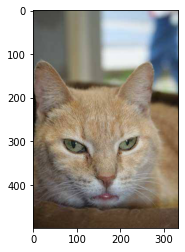

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
j2= imread("cat.41.jpg")
plt.imshow(j2)
img_resized4= resize(j2,(50,50,3))
f4=img_resized4.flatten()
grid.predict([f4])

In [ ]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/cat.57.jpg         
  inflating: test/cat.58.jpg         
  inflating: test/cat.59.jpg         
  inflating: test/cat.60.jpg         
  inflating: test/cat.61.jpg         
  inflating: test/cat.62.jpg         
  inflating: test/cat.63.jpg         
  inflating: test/cat.64.jpg         
  inflating: test/cat.65.jpg         
  inflating: test/dog.84.jpg         
  inflating: test/dog.85.jpg         
  inflating: test/dog.86.jpg         
  inflating: test/dog.87.jpg         
  inflating: test/dog.88.jpg         
  inflating: test/dog.89.jpg         
  inflating: test/dog.90.jpg         
  inflating: test/dog.91.jpg         
  inflating: test/dog.92.jpg         


array(['cat'], dtype=object)

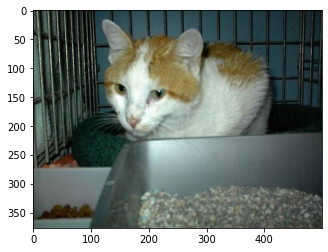

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
j2= imread("test/cat.62.jpg")
plt.imshow(j2)
img_resized4= resize(j2,(50,50,3))
f4=img_resized4.flatten()
grid.predict([f4])

array(['dog'], dtype=object)

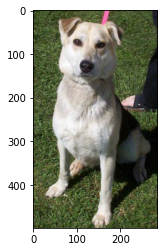

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
j3= imread("test/dog.90.jpg")
plt.imshow(j3)
img_resized5= resize(j3,(50,50,3))
f5=img_resized5.flatten()
grid.predict([f5])